# Regresión Logística Multinomial
## Sergio García Prado

## Ajuste Multinomial
Utilizando las tablas de datos en los ficheros datos1 y datos2 ajusta un modelo de regresión
logística multinomial para predecir el grupo de pertenencia (Y) en función de las variables
explicativas (X1,X2) (Para ello utiliza una modelización tipo Y~X1+X2).

Obtén intervalos de confianza al 95% para los coeficientes de las variables explicativas en el
modelo ajustado por el método de Wald y por el correspondiente a la verosimilitud perfil.

Obtén intervalos de confianza al 95% para la probabilidad de pertenecer al grupo 2 en relación
a la probabilidad de pertenecer al grupo 1 en los valores observados de las variables explicativas.

Para los valores observados de las variables explicativas obtén estimaciones de la probabilidad
de pertenecer a cada uno de los tres grupos.

Clasifica cada individuo al grupo para el que tiene mayor probabilidad a posteriori de pertenecer
y evalúa la clasificación obtenida

Ajusta otros modelos logísticos a los datos y selecciona el que parezca más interesante.

In [1]:
rm(list = ls())

In [2]:
library(nnet)
library(MASS)

### Datos 1

In [3]:
datos1 <- read.table('data/datos1.txt', header = TRUE)
datos1$G <- as.factor(datos1$G)

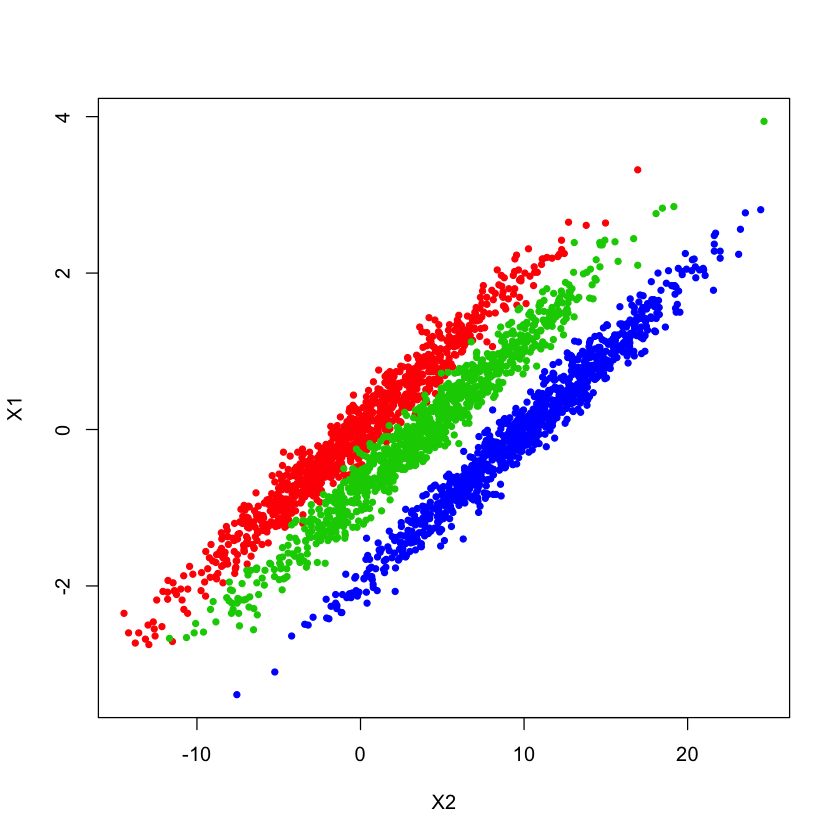

In [4]:
plot(X1 ~ X2, col = as.numeric(G) + 1, data = datos1, pch=20)

In [5]:
polr(G ~ X1 + X2, data=datos1)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

Call:
polr(formula = G ~ X1 + X2, data = datos1)

Coefficients:
        X1         X2 
-22.009687   4.396455 

Intercepts:
      1|2       2|3 
 8.583307 30.753973 

Residual Deviance: 249.2769 
AIC: 257.2769 

In [6]:
multinom(G ~ X1 + X2, data=datos1)

# weights:  12 (6 variable)
initial  value 3295.836866 
iter  10 value 429.245499
iter  20 value 128.073643
iter  30 value 122.645527
iter  40 value 122.583734
iter  50 value 122.559239
iter  60 value 122.504338
iter  70 value 122.493994
iter  80 value 122.486304
iter  90 value 122.480082
iter 100 value 122.473220
final  value 122.473220 
stopped after 100 iterations


Call:
multinom(formula = G ~ X1 + X2, data = datos1)

Coefficients:
  (Intercept)        X1        X2
2   -8.205141 -21.04663  4.201596
3  -75.721683 -69.37726 13.964826

Residual Deviance: 244.9464 
AIC: 256.9464 

### Datos 2

In [7]:
datos2 <- read.table('data/datos2.txt', header = TRUE)
datos2$Y <- as.factor(datos2$Y)

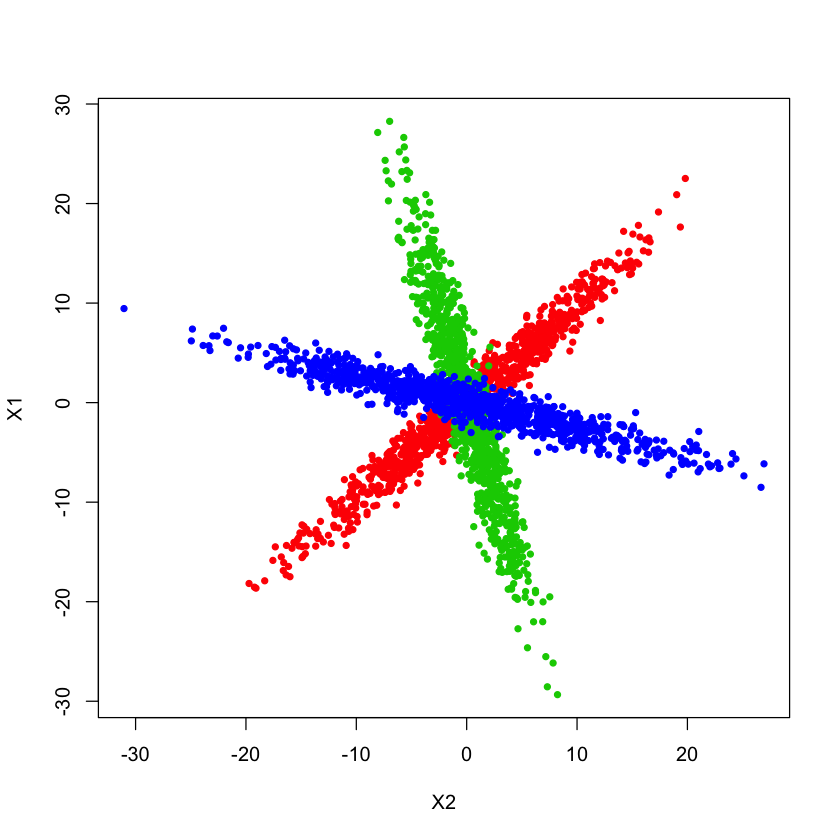

In [8]:
plot(X1 ~ X2, col = as.numeric(Y) + 1, data = datos2, pch = 20)

In [9]:
multinom(Y ~ X1 + X2, data=datos2)

# weights:  12 (6 variable)
initial  value 3295.836866 
final  value 3295.229689 
converged


Call:
multinom(formula = Y ~ X1 + X2, data = datos2)

Coefficients:
    (Intercept)           X1           X2
2 -3.443332e-05 -0.003254659 0.0009150342
3 -1.012462e-03 -0.003562986 0.0054936263

Residual Deviance: 6590.459 
AIC: 6602.459 

In [10]:
polr(Y ~ X1 + X2, data=datos2)

Call:
polr(formula = Y ~ X1 + X2, data = datos2)

Coefficients:
          X1           X2 
-0.001711288  0.004951489 

Intercepts:
       1|2        2|3 
-0.6925028  0.6941925 

Residual Deviance: 6590.604 
AIC: 6598.604 

## Simulación

Una justificación para el modelo de odds proporcionales en la modelización por regresión
logística de la relación entre una variable respuesta cualitativa y una variable explicativa
numérica corresponde a que la variable cualitativa provenga de categorizar una variable
numérica con una distribución logística.

Simula 5000 observaciones de este modelo: distribución logística relacionada linealmente con
una variable numérica y categoriza la variable numérica en 4 grupos. Ajusta una regresión
logística multinomial de odds proporcionales a estos datos y relaciona las estimaciones de los
parámetros con los parámetros simulados.

In [11]:
n <- 5000
k <- 4

In [12]:
(n.sampled <- c(rmultinom(1, size=n,prob=rep(1, 4)/4)))

[1] 1237 1246 1226 1291

In [13]:
GenerateSample <- function(n.sampled, min, max) {
    k <- length(n.sampled)
    ranges <- seq(min, max, length = k + 1)
    l <- sapply(1:k, function(i) {
        cbind(i, runif(n.sampled[i], ranges[i], ranges[i + 1]))
    })
    df <- as.data.frame(do.call("rbind", l))
    colnames(df) <- c('Y', 'X')
    df$Y <- as.factor(df$Y)
    return(df)
}

In [14]:
ordinal.data <- GenerateSample(n.sampled, -50, 50)

In [15]:
ordinal.data <- cbind(ordinal.data, model.matrix( ~ 0 + Y, ordinal.data))

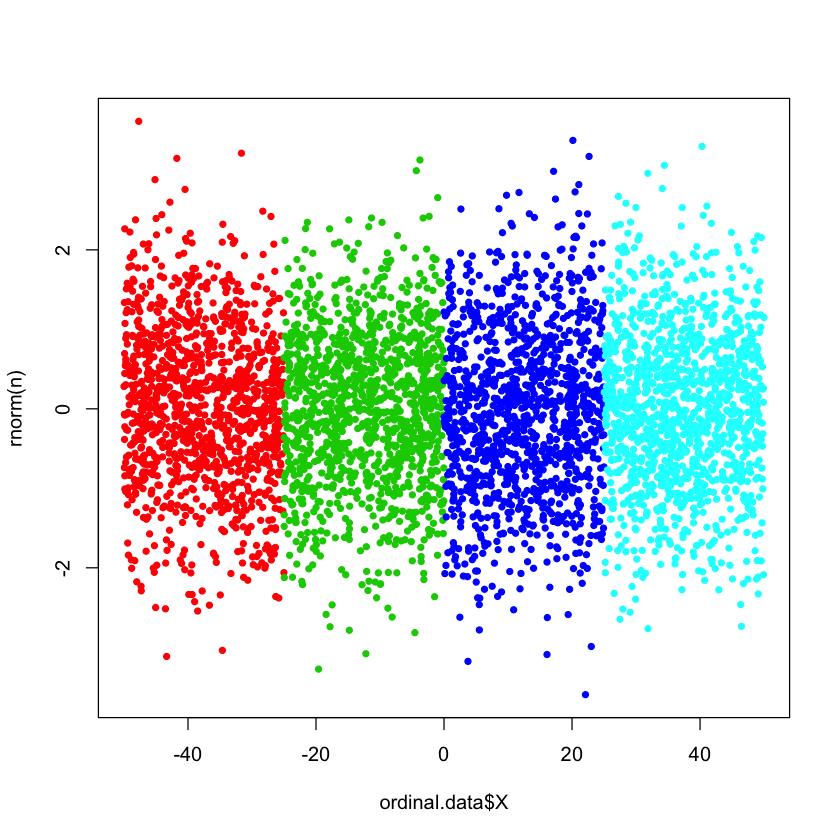

In [20]:
plot(ordinal.data$X, rnorm(n), col=as.numeric(ordinal.data$Y) + 1, pch=20)

In [17]:
(m <- multinom(Y ~ X + 1, data=ordinal.data))

# weights:  12 (6 variable)
initial  value 6931.471806 
iter  10 value 1781.684083
iter  20 value 293.463795
iter  30 value 39.473319
iter  40 value 19.893255
iter  50 value 10.614585
iter  60 value 4.384844
iter  70 value 4.366003
iter  80 value 4.310656
iter  90 value 4.261761
iter 100 value 4.249222
final  value 4.249222 
stopped after 100 iterations


Call:
multinom(formula = Y ~ X + 1, data = ordinal.data)

Coefficients:
  (Intercept)         X
2    686.6719  27.45345
3    687.9103 315.04411
4   -472.2180 361.42573

Residual Deviance: 8.498444 
AIC: 20.49844 

In [18]:
a <- c(coef(m)[, 2], mean(coef(m)[, 1]))

In [19]:
# polr(Y ~ X, data=ordinal.data, start = a)